## Task 4: Data Collection in the Wild [4 marks]

### Task Description

For this exercise, marks will not depend on what numbers you get but on the process you followed. Utilize apps like Physics Toolbox Suite from your smartphone to collect your data in .csv/.txt format. Ensure at least 15 seconds of data is collected, trimming edges to obtain 10 seconds of relevant data. Also, record a video of yourself while recording data. This video will be required in some future assignments. Collect 3-5 samples per activity class.

### Things to Take Care Of

- **Ensure the phone is placed in the same position for all the activities.**
- **Ensure the phone is in the same alignment during the activity** as changing the alignment will change the data collected and will affect the model's performance.
- **Ensure to have at least 10 seconds of data per file for training.** As the data is collected at 50Hz, you will have 500 data samples.


### Questions

1. **Use the Decision Tree model trained on the UCI-HAR dataset to predict the activities that you performed.** Report the accuracy, precision, recall, and confusion matrix of the model. You have three versions of the UCI dataset you can use:
    - a) Raw data from accelerometer
    - b) TSFEL featurized data
    - c) Features provided by author

   Choose which version to use, ensuring that your test data is similar to your training data. How did the model perform? [1 mark]

2. **Use the data you collected to predict the activities that you performed.** Decide whether to apply preprocessing and featurization, and if so, choose the appropriate methods. How did the model perform? [1 mark]

3. **Use the Few-Shot prompting method using the UCI-HAR dataset to predict the activities that you performed.** Ensure that both your examples and test query undergo similar preprocessing. How did the model perform? [1 mark]

4. **Use the Few-Shot prompting method using the data you collected to predict the activities that you performed.** Adopt proper processing methods as needed. How did the model perform? [1 mark]


In [1]:
import os
import pandas as pd
import numpy as np

files = r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\files'  

activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

X_test_my = []
y_test_my = []

for activity in activities:
    activity_path = os.path.join(files, activity)
    for file_name in os.listdir(activity_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(activity_path, file_name)
            data = pd.read_csv(file_path)

            data = data[['ax (m/s^2)', 'ay (m/s^2)', 'az (m/s^2)']]

            data = data.iloc[500:]

            data = data.groupby(np.arange(len(data)) // 2).mean()

            if activity == 'SITTING':
                if data.shape[0] < 500:
                
                    padding = np.zeros((500 - data.shape[0], 3))
                    data = np.vstack([data, padding])
                elif data.shape[0] > 500:
                
                    data = data.iloc[:500]
            else:
                if data.shape[0] > 500:
                    data = data.iloc[:500]
                elif data.shape[0] < 500:
    
                    continue

            if data.shape == (500, 3):
                if isinstance(data, pd.DataFrame):
                    data = data.to_numpy()
                    data_flattened = data.flatten()
                X_test_my.append(data_flattened)
                y_test_my.append(activity)
            else:
                print(f"File {file_name} in {activity} has an incorrect shape after processing: {data.shape}")

X_test_my = np.array(X_test_my)
y_test_my = np.array(y_test_my)

print("X_test_my shape:", X_test_my.shape)
print("y_test_my shape:", y_test_my.shape)

print(y_test_my)
label_mapping = {
    'WALKING': 4.,
    'WALKING_UPSTAIRS': 6.,
    'WALKING_DOWNSTAIRS': 5.,
    'SITTING': 2.,
    'STANDING': 3.,
    'LAYING': 1.
}


y_test_my_encoded = np.array([label_mapping[label] for label in y_test_my])


print("Original labels:", y_test_my)
print("Encoded labels:", y_test_my_encoded)


X_test_my shape: (18, 1500)
y_test_my shape: (18,)
['WALKING' 'WALKING' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS'
 'WALKING_DOWNSTAIRS' 'SITTING' 'SITTING' 'SITTING' 'STANDING' 'STANDING'
 'STANDING' 'LAYING' 'LAYING' 'LAYING']
Original labels: ['WALKING' 'WALKING' 'WALKING' 'WALKING_UPSTAIRS' 'WALKING_UPSTAIRS'
 'WALKING_UPSTAIRS' 'WALKING_DOWNSTAIRS' 'WALKING_DOWNSTAIRS'
 'WALKING_DOWNSTAIRS' 'SITTING' 'SITTING' 'SITTING' 'STANDING' 'STANDING'
 'STANDING' 'LAYING' 'LAYING' 'LAYING']
Encoded labels: [4. 4. 4. 6. 6. 6. 5. 5. 5. 2. 2. 2. 3. 3. 3. 1. 1. 1.]


In [46]:
xtrain=r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\X_train.csv'
ytrain=r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\y_train.csv'
xtrain = np.genfromtxt(xtrain, delimiter=',')  
ytrain = np.genfromtxt(ytrain, delimiter=',')

print(xtrain.shape)
print(ytrain.shape)


(126, 1500)
(126,)


In [47]:
import numpy as np

xtrain_mean = np.mean(xtrain, axis=0)
xtrain_std = np.std(xtrain, axis=0)

X_test_my_mean = np.mean(X_test_my, axis=0)
X_test_my_std = np.std(X_test_my, axis=0)

print("Training Data Mean:\n", xtrain_mean)
print("Training Data Standard Deviation:\n", xtrain_std)

print("Test Data Mean:\n", X_test_my_mean)
print("Test Data Standard Deviation:\n", X_test_my_std)

mean_diff = np.abs(xtrain_mean - X_test_my_mean)
std_diff = np.abs(xtrain_std - X_test_my_std)

print("Difference in Means:\n", mean_diff)
print("Difference in Standard Deviations:\n", std_diff)




Training Data Mean:
 [0.82589789 0.01791627 0.09337929 ... 0.82596409 0.01251432 0.0806323 ]
Training Data Standard Deviation:
 [0.3965039  0.37999307 0.33958718 ... 0.40352661 0.40651306 0.34479597]
Test Data Mean:
 [ 0.01073056  0.32234167  0.00492222 ... -0.01503056  0.37607222
  0.01045833]
Test Data Standard Deviation:
 [0.02292165 0.14814438 0.07688364 ... 0.06214222 0.32416848 0.08528621]
Difference in Means:
 [0.81516734 0.3044254  0.08845707 ... 0.84099465 0.3635579  0.07017397]
Difference in Standard Deviations:
 [0.37358225 0.23184869 0.26270354 ... 0.3413844  0.08234458 0.25950976]


In [40]:
print("Training labels unique values:", np.unique(ytrain))
print("Test labels unique values:", np.unique(y_test_my_encoded))


Training labels unique values: [1. 2. 3. 4. 5. 6.]
Test labels unique values: [1. 2. 3. 4. 5. 6.]


In [48]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

clf = DecisionTreeClassifier(
    criterion="gini", random_state=46, min_samples_split=4, max_features='sqrt'
)

clf.fit(xtrain, ytrain)

ypred = clf.predict(X_test_my)

accuracy = accuracy_score(y_test_my_encoded, ypred)
precision = precision_score(y_test_my_encoded, ypred, average='weighted', zero_division=0)
recall = recall_score(y_test_my_encoded, ypred, average='weighted', zero_division=0)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.1667
Precision: 0.0278
Recall: 0.1667


The Decision Tree model did not perform well on my data, as shown by the results. This could be due to errors in data collection or because my data have different value trends as we can see that the mean and standard deviation is comparable to the UCI-HAR dataset.


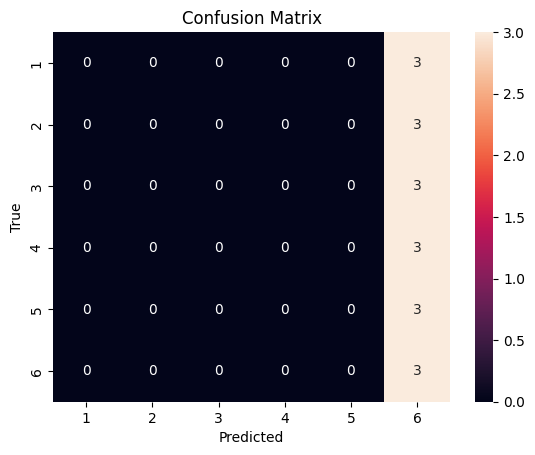

In [43]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

mat = confusion_matrix(y_test_my_encoded, clf.predict(X_test_my))
sns.heatmap(mat, annot=True, fmt="d", cbar=True, xticklabels=[1, 2, 3, 4, 5, 6], yticklabels=[1, 2, 3, 4, 5, 6])

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

plt.show()

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import os

files = r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\files'

activities = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

X_train = []
y_train = []
X_test = []
y_test = []

for activity in activities:
    activity_path = os.path.join(files, activity)
    for file_name in os.listdir(activity_path):
        if file_name.endswith('.csv'):
            participant_id = file_name.split('_')[-1].split('.')[0]  
            file_path = os.path.join(activity_path, file_name)
            data = pd.read_csv(file_path)

            data = data[['ax (m/s^2)', 'ay (m/s^2)', 'az (m/s^2)']]

            data = data.iloc[500:]

            data = data.groupby(np.arange(len(data)) // 2).mean()

            if data.shape[0] > 500:
                data = data.iloc[:500]
            elif data.shape[0] < 500:
                padding = np.zeros((500 - data.shape[0], 3))
                data = np.vstack([data, padding])
            else:
                data = data.to_numpy()

            if participant_id == '3':  
                X_test.append(data)
                y_test.append(activity)
            else:  
                X_train.append(data)
                y_train.append(activity)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

clf = DecisionTreeClassifier()
clf.fit(X_train_reshaped, y_train)

y_pred = clf.predict(X_test_reshaped)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print("X_train sample:", X_train[0])
print("y_train sample:", y_train[0])
print("X_test sample:", X_test[0])
print("y_test sample:", y_test[0])


Accuracy: 0.50
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]]
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00         1
           SITTING       1.00      1.00      1.00         1
          STANDING       0.00      0.00      0.00         1
           WALKING       0.33      1.00      0.50         1
WALKING_DOWNSTAIRS       0.00      0.00      0.00         1
  WALKING_UPSTAIRS       0.00      0.00      0.00         1

          accuracy                           0.50         6
         macro avg       0.39      0.50      0.42         6
      weighted avg       0.39      0.50      0.42         6

X_train shape: (12, 500, 3)
y_train shape: (12,)
X_test shape: (6, 500, 3)
y_test shape: (6,)
X_train sample: [[ 0.0021   0.3721   0.0507 ]
 [ 0.0034   0.3748   0.05155]
 [ 0.00515  0.38235  0.0528 ]
 ...
 [-0.01285  0.3113   0.0554 ]
 [-0.01415  0.3

In [22]:
import numpy as np
import pandas as pd
from langchain_groq import ChatGroq
import os
from sklearn.tree import DecisionTreeClassifier

In [23]:
from dotenv import load_dotenv

load_dotenv()

Groq_Token = os.getenv('api_key')
groq_models = {"llama3-70b": "llama3-70b-8192", "mixtral": "mixtral-8x7b-32768", "gemma-7b": "gemma-7b-it","llama3.1-70b":"llama-3.1-70b-versatile","llama3-8b":"llama3-8b-8192","llama3.1-8b":"llama-3.1-8b-instant","gemma-9b":"gemma2-9b-it"}
model_name = "llama3.1-70b"
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)

In [24]:
import pandas as pd

laying_train = pd.read_csv("Combined/Train/LAYING/Subject_1.csv")
sitting_train = pd.read_csv("Combined/Train/SITTING/Subject_1.csv")
standing_train = pd.read_csv("Combined/Train/STANDING/Subject_1.csv")
walking_train = pd.read_csv("Combined/Train/WALKING/Subject_1.csv")
downstairs_train = pd.read_csv("Combined/Train/WALKING_DOWNSTAIRS/Subject_1.csv")
upstairs_train = pd.read_csv("Combined/Train/WALKING_UPSTAIRS/Subject_1.csv")

laying_df = laying_train.head(100)
sitting_df = sitting_train.head(100)
standing_df = standing_train.head(100)
walking_df = walking_train.head(100)
downstairs_df = downstairs_train.head(100)
upstairs_df = upstairs_train.head(100)

df1 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\files\LAYING\LAYING_1.csv').head(100)
df2 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/SITTING/SITTING_1.csv').head(100)
df3 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/STANDING/STANDING_1.csv').head(100)
df4 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING/WALKING_1.csv').head(100)
df5 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_DOWNSTAIRS/WALKING_DOWNSTAIRS_1.csv').head(100)
df6 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_UPSTAIRS/WALKING_UPSTAIRS_1.csv').head(100)


In [26]:
# Few Shot demonstration
few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide only labels for the dataset. 

Here are some examples:
1.Dataset of laying: {laying_df}
2.Dataset of sitting: {sitting_df}
3.Dataset of standing: {standing_df}
4.Dataset of walking: {walking_df}
5.Dataset of walking downstairs: {downstairs_df}
6.Dataset of walking upstairs: {upstairs_df}

Here is the accelerometer data:
{df1}, 
{df2},
{df3},
{df4},
{df5},
{df6}

Please classify the activity for these six accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)
print(few_shot_answer.content)

Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, Walking Downstairs.

1. Dataset 1: Laying
2. Dataset 2: Sitting
3. Dataset 3: Standing
4. Dataset 4: Walking
5. Dataset 5: Walking Downstairs
6. Dataset 6: Walking Upstairs

And for the given accelerometer data:

1. Dataset: Laying
2. Dataset: Sitting
3. Dataset: Standing
4. Dataset: Walking Downstairs
5. Dataset: Walking
6. Dataset: Walking Upstairs


In this question we can see that the few shot prompting method, trained on UCI-HAR data and when tested on my data predicted two activities opposite (case 4,5).

In [36]:
import pandas as pd



laying_train = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\files\LAYING\LAYING_1.csv').head(100)
sitting_train = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/SITTING/SITTING_1.csv').head(100)
standing_train = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/STANDING/STANDING_1.csv').head(100)
walking_train= pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING/WALKING_1.csv').head(100)
downstairs_train = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_DOWNSTAIRS/WALKING_DOWNSTAIRS_1.csv').head(100)
upstairs_train= pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_UPSTAIRS/WALKING_UPSTAIRS_1.csv').head(100)


laying_df = laying_train.head(100)
sitting_df = sitting_train.head(100)
standing_df = standing_train.head(100)
walking_df = walking_train.head(100)
downstairs_df = downstairs_train.head(100)
upstairs_df = upstairs_train.head(100)

df1 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset\files\LAYING\LAYING_2.csv').head(100)
df2 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/SITTING/SITTING_2.csv').head(100)
df3 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/STANDING/STANDING_2.csv').head(100)
df4 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING/WALKING_2.csv').head(100)
df5 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_DOWNSTAIRS/WALKING_DOWNSTAIRS_2.csv').head(100)
df6 = pd.read_csv(r'C:\Users\arpit\OneDrive\Desktop\es335-24-fall-assignment-1\UCI HAR Dataset/files/WALKING_UPSTAIRS/WALKING_UPSTAIRS_2.csv').head(100)

In [39]:
# Few Shot demonstration
few_shot_prompt = f""" 
* You are a human activity recognition model.
* Your task is to classify the following accelerometer data into one of the six activities: Walking, Standing, Sittting, Laying, Walking Upstairs, Walking Downstairs. 
* Provide only labels for the dataset. 

Here are some examples:
1.Dataset of laying: {laying_df}
2.Dataset of sitting: {sitting_df}
3.Dataset of standing: {standing_df}
4.Dataset of walking: {walking_df}
5.Dataset of walking downstairs: {downstairs_df}
6.Dataset of walking upstairs: {upstairs_df}

Here is the accelerometer data:
{df1}, 
{df2},
{df3},
{df4},
{df5},
{df6}

Please classify the activity for these six accelerometer data using the dataset of sample activites.
"""
few_shot_answer = llm.invoke(few_shot_prompt)
print(few_shot_answer.content)

Based on the provided accelerometer data, I will classify each dataset into one of the six activities: Walking, Standing, Sitting, Laying, Walking Upstairs, Walking Downstairs.

1. Dataset: Laying
2. Dataset: Sitting
3. Dataset: Standing
4. Dataset: Walking
5. Dataset: Walking Downstairs
6. Dataset: Walking Upstairs

Now, classifying the given accelerometer data:

1. 
        time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0   0.002873     -0.0091      0.0063     -0.1729       0.173
...
 
Activity: Laying

2. 
        time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0   0.002991      0.0012      0.4096      0.0324       0.411
...
 
Activity: Sitting

3. 
        time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0   0.003048      0.0003      0.4234      0.0135       0.424
...
 
Activity: Standing

4. 
        time  ax (m/s^2)  ay (m/s^2)  az (m/s^2)  aT (m/s^2)
0   0.002925     -0.0160      0.3969      0.0369       0.399
...
 
Activity: Walking

5. 
        time  ax (m/s^2) 

In this question, the accuracy is 100% this means that the few shot prompting method predicted my data well when trained on my collected data only.
